In [3]:
!pip3 install tensorflow-data-validation[visualization]
!sudo apt-get install libsnappy-dev
!sudo pip3 install python-snappy
!pip3 install apache-beam[interactive]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libsnappy1v5
The following NEW packages will be installed:
  libsnappy-dev libsnappy1v5
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 117 kB of archives.
After this operation, 254 kB of additional disk space will be used.
Do you want to continue? [Y/n] ^C
  Using cached https://files.pythonhosted.org/packages/45/35/65d9f8cc537129894b4b32647d80212d1fa342877581c5b8a69872cea8be/python-snappy-0.5.4.tar.gz
  Running setup.py bdist_wheel for python-snappy ... error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-33mho8cv/python-snappy/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp1qg647vupip-wheel- --python-tag cp35:
  /usr/lib/python3.5/dist

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow_datasets.image.pathVQA import Pathvqa
pathvqa = Pathvqa()

ds = tfds.load('pathvqa', download_and_prepare_kwargs={
    'download_config' : tfds.download.DownloadConfig(manual_dir='gs://bme590/roujia/pathVQARW', 
                                                     compute_stats='skip')
})

Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete73T43U/pathvqa-train.tfrecord


Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete73T43U/pathvqa-test.tfrecord


Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete73T43U/pathvqa-validation.tfrecord


Dataset pathvqa downloaded and prepared to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0. Subsequent calls will reuse this data.


In [7]:
ds

{'test': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>,
 'train': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>,
 'validation': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>}

In [8]:
ds_iter = iter(ds['test'])
ds_val = next(ds_iter)
imageArray = ds_val["image"]
shapeArray = ds_val["image_shape"]
questions = ds_val["question"]
answers = ds_val["answer"]
print(imageArray)
print(shapeArray)
print(questions)
print(answers)

tf.Tensor([19 19 19 ...  1  1  1], shape=(196608,), dtype=uint8)
tf.Tensor([256 256   3], shape=(3,), dtype=int32)
tf.Tensor(
[b'What is the marrow of the lateral femoral condyle and the lateral tibial plateau representing?'
 b'Is the marrow of the lateral femoral condyle and the lateral tibial plateau representing bone marrow edeam?'
 b'Is the information from this single voxel representing bone marrow edeam?'
 b'What demonstrates high signal within the marrow of the lateral femoral condyle and the lateral tibial plateau representing bone marrow edeam?'
 b'Where does t2 cor image demonstrate high signal?'
 b'What does t2 cor image demonstrate?'
 b'Does t2 cor image demonstrate high signal within the marrow of the lateral femoral condyle and the lateral tibial plateau representing bone marrow edeam?'
 b'Does fat-saturated sagittal t2 mri of the spine demonstrate high signal within the marrow of the lateral femoral condyle and the lateral tibial plateau representing bone marrow edeam?']

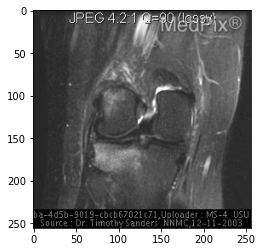

In [5]:
image = pathvqa.reshape_image(ds_val)
plt.imshow(image)